In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/content/iris(1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [10]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [11]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

checking outliers

Text(0.5, 1.0, 'Box Plot of SW')

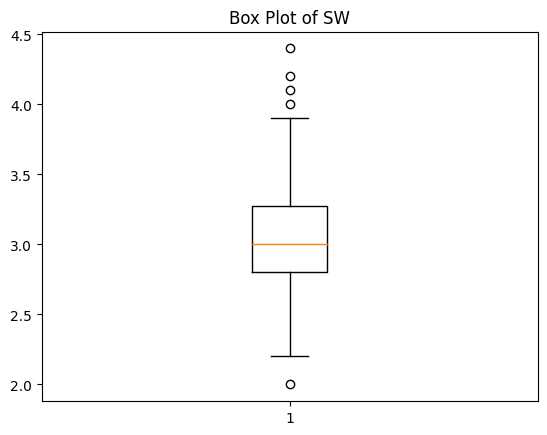

In [13]:
plt.boxplot(data['SW'])
plt.title('Box Plot of SW')

In [14]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

<ipython-input-14-a2ab872643a7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
<ipython-input-14-a2ab872643a7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
<ipython-input-14-a2ab872643a7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['SW'],

In [15]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [16]:
data['SW'].median()

3.0

In [17]:
IQR=Q3-Q1

In [18]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [19]:
outlier=[]
for x in data['SW']:
  if((x>up_lim)or(x<low_lim)):
    outlier.append(x)

In [20]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
ind1=data['SW']>up_lim 
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [22]:
data.drop([14, 15, 32, 33],inplace=True)
          

Text(0.5, 1.0, 'SW')

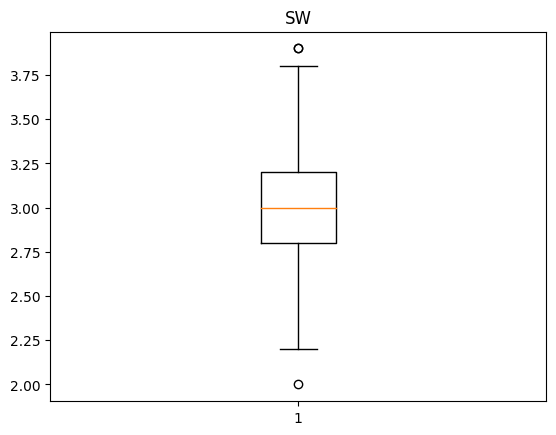

In [23]:
plt.boxplot(data['SW'])
plt.title('SW')

Text(0.5, 1.0, 'Box Plot of SL')

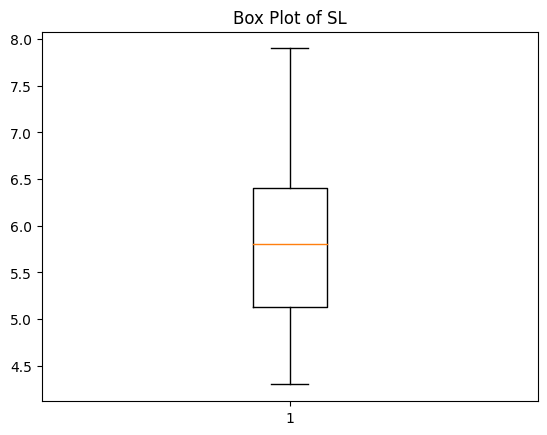

In [24]:
plt.boxplot(data['SL'])
plt.title('Box Plot of SL')

Text(0.5, 1.0, 'Box Plot of PW')

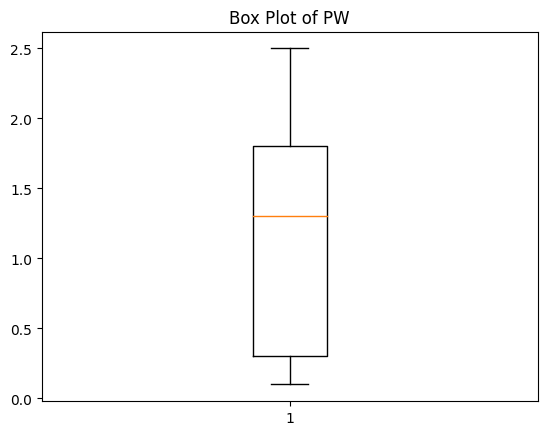

In [25]:
plt.boxplot(data['PW'])
plt.title('Box Plot of PW')

Text(0.5, 1.0, 'Box Plot of PL')

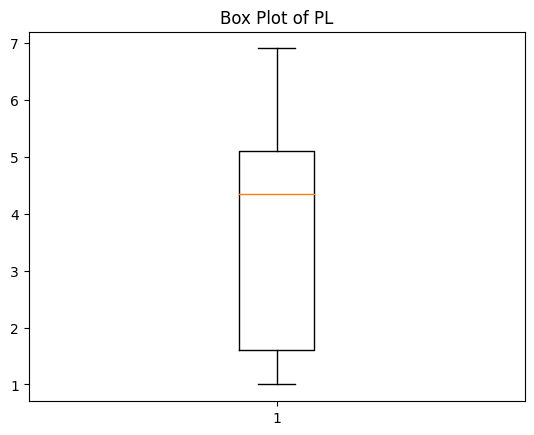

In [26]:
plt.boxplot(data['PL'])
plt.title('Box Plot of PL')

In [27]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
x_train.shape

(102, 4)

**logistic regression model**

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [31]:
lr.fit(x_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions=lr.predict(x_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [33]:
y_test

7          Iris-setosa
26         Iris-setosa
29         Iris-setosa
123     Iris-virginica
146     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
24         Iris-setosa
116     Iris-virginica
28         Iris-setosa
44         Iris-setosa
82     Iris-versicolor
134     Iris-virginica
66     Iris-versicolor
75     Iris-versicolor
95     Iris-versicolor
18         Iris-setosa
58     Iris-versicolor
102     Iris-virginica
8          Iris-setosa
93     Iris-versicolor
41         Iris-setosa
120     Iris-virginica
88     Iris-versicolor
148     Iris-virginica
37         Iris-setosa
147     Iris-virginica
94     Iris-versicolor
87     Iris-versicolor
109     Iris-virginica
80     Iris-versicolor
20         Iris-setosa
49         Iris-setosa
54     Iris-versicolor
48         Iris-setosa
2          Iris-setosa
67     Iris-versicolor
10         Iris-setosa
135     Iris-virginica
111     Iris-virginica
63     Iris-versicolor
114     Iris-virginica
65     Iris-versicolor
77     Iris

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9090909090909091

*ACCURACY=90%

Standard scalling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scalar=StandardScaler()

In [37]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
predictions=lr.predict(x_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
y_test

7          Iris-setosa
26         Iris-setosa
29         Iris-setosa
123     Iris-virginica
146     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
24         Iris-setosa
116     Iris-virginica
28         Iris-setosa
44         Iris-setosa
82     Iris-versicolor
134     Iris-virginica
66     Iris-versicolor
75     Iris-versicolor
95     Iris-versicolor
18         Iris-setosa
58     Iris-versicolor
102     Iris-virginica
8          Iris-setosa
93     Iris-versicolor
41         Iris-setosa
120     Iris-virginica
88     Iris-versicolor
148     Iris-virginica
37         Iris-setosa
147     Iris-virginica
94     Iris-versicolor
87     Iris-versicolor
109     Iris-virginica
80     Iris-versicolor
20         Iris-setosa
49         Iris-setosa
54     Iris-versicolor
48         Iris-setosa
2          Iris-setosa
67     Iris-versicolor
10         Iris-setosa
135     Iris-virginica
111     Iris-virginica
63     Iris-versicolor
114     Iris-virginica
65     Iris-versicolor
77     Iris

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9545454545454546

**Accuracy is 95%**

**KNN MODEL**

In [43]:
 from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors: 
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')   
  classifier.fit(x_train,y_train) 
  predictions=classifier.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  acc_values.append(acc)


In [44]:
acc_values

[0.8863636363636364,
 0.9545454545454546,
 0.8863636363636364,
 0.9772727272727273,
 0.9090909090909091,
 0.9545454545454546,
 0.9318181818181818,
 0.9545454545454546,
 0.9545454545454546,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273]

Text(0, 0.5, 'accuracy')

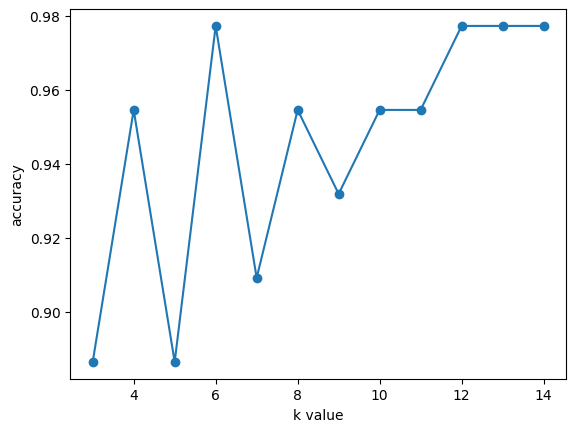

In [45]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]])

choosing k=10

In [48]:
 from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors: 
  classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski')   
  classifier.fit(x_train,y_train) 
  predictions=classifier.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  acc_values.append(acc)

In [49]:
print('Accuracy is',accuracy_score(y_test,predictions))

Accuracy is 0.9545454545454546


**DECISION TREE**

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_model=DecisionTreeClassifier()

In [52]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
#print metric to get performance
print('Accuracy is:',dt_model.score(x_test,y_test)*100)

Accuracy is: 88.63636363636364


**LINEAR SVM**

In [54]:
from sklearn.svm import SVC



In [55]:
svm_linear=SVC(kernel='linear')

In [56]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred=svm_linear.predict(x_test)

In [58]:
print('Accuracy is;',accuracy_score(y_test,y_pred))

Accuracy is; 0.9090909090909091


**Random forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf=RandomForestClassifier(n_estimators=100)

In [61]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
predictions=clf.predict(x_test)

In [63]:
print('Accuracy is:',accuracy_score(y_test,predictions))

Accuracy is: 0.9090909090909091



# ACCURACY GOT

LOGISTIC REGRESSION=95%
KNN=95%
DECISION TREE=88%
LINEAR SVM=90%
RANDOM FOREST=90% *italicized text*



```
# This is formatted as code
```

# Logestic Reggresion and KNN Model gives Good Results.